In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import numpy as np
import pygritbx

In [2]:
# Unit vecotrs for reference frame
i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
k = np.array([0, 0, 1])
referenceFrame = np.array([i, j, k])

In [3]:
# Material
A1_material = pygritbx.Material(name="C45 quenched and tempered steel", sigma_u=780, sigma_y=370, sigma_Dm1=380)
A2_material = pygritbx.Material(name="34CrNiMo6 quenched and tempered steel", sigma_u=1050, sigma_y=950, sigma_Dm1=520)
gear_material = pygritbx.Material(name="Steel", sigma_u=1950, sigma_y=1450, HB=525)

In [4]:
# Input Motor
input_motor = pygritbx.Motor(name="Input Motor", loc=0, power=15e3, n=750, axis=k)

In [5]:
# Locations
# Shaft A1
locG2 = 146 - 82 - (41 / 2) # [mm]
locG3 = 311 - 92 + 39 + (41 / 2) # [mm]
locA = 146 - 29 + 34 # [mm]
locB = 311 - 92 + 29 - 34 # [mm]
# Shaft A2
a = 216.2 # [mm]
b = 70.2 # [mm]
c = 169.8 # [mm]
locG4 = b + c # [mm]


In [6]:
# Gears
# G1
G1 = pygritbx.Gear(name="G1", axis=k, m_n=4, z=32, psi=-21, phi_n=20, Q_v=8, FW=44, material=gear_material)
# G2
G2 = pygritbx.Gear(name="G2", axis=k, loc=locG2, m_n=4, z=24, psi=21, phi_n=20, Q_v=8, FW=44, material=gear_material)
# G3
G3 = pygritbx.BevelGear(name="G3", axis=k, loc=locG3, m_n=5, z=24, gamma=45, phi_n=20, Q_v=8, FW=30, material=gear_material)
# G4
G4 = pygritbx.BevelGear(name="G4", axis=j, loc=locG4, m_n=5, z=24, gamma=45, phi_n=20, Q_v=8, FW=30, material=gear_material)

In [7]:
# Supports
# A
A = pygritbx.Support(name="A", type="Roller", bearingType="Contact Ball", catalogueName="7311 ACCBM", catalogueType="Explorer", 
                    d=55, D=120, B=29, C=96.5*1e3, C0=67*1e3, Pu=2.85*1e3, nr=7500, a=34, e=1.14, X=0.57, Y0=0.52, Y1=0.55,
                    Y2=0.93, A=0.0234, kr=0.1, R=0.57, shoulder=1, arr="F2F", axis=k, loc=locA)
# B
B = pygritbx.Support(name="B", type="Pin", bearingType="Contact Ball", catalogueName="7311 ACCBM", catalogueType="Explorer", 
                    d=55, D=120, B=29, C=96.5*1e3, C0=67*1e3, Pu=2.85*1e3, nr=7500, a=34, e=1.14, X=0.57, Y0=0.52, Y1=0.55,
                    Y2=0.93, A=0.0234, kr=0.1, R=0.57, shoulder=-1, arr="F2F", axis=k, loc=locB)
# C
C = pygritbx.Support(name="C", type="Roller", bearingType="Tapered", catalogueName="30311", catalogueType="Explorer", 
                    d=55, D=120, C=176*1e3, C0=163*1e3, Pu=19.3*1e3, nr=4800, e=0.35, Y=1.7, Y0=1.8, Y1=1.9,
                    Y2=2.9, shoulder=1, arr="B2B", axis=j, loc=a+b+c)
# D
D = pygritbx.Support(name="D", type="Pin", bearingType="Tapered", catalogueName="30314", catalogueType="Explorer", 
                    d=70, D=150, C=271*1e3, C0=260*1e3, Pu=31*1e3, nr=3800, e=0.35, Y=1.7, Y0=1.8, Y1=1.9,
                    Y2=2.9, shoulder=-1, arr="B2B", axis=j, loc=c)

In [8]:
# Output Component
output = pygritbx.Component(name="Output", material=None, axis=j)

In [9]:
# Gearbox Configuration
# Shaft A
Ap = pygritbx.Shaft(name="Ap", inputs=[input_motor], outputs=[G1], axis=k, material=None, sups=np.array([]), loc=[0, 0, 0])
# Mesh M1
M1 = pygritbx.GearMesh(name="M1", drivingGear=G1, drivenGear=G2, radiality=[j], type="External")
# Shaft A1
A1 = pygritbx.Shaft(name="A1", inputs=[G2], outputs=[G3], axis=k, material=A1_material, sups=np.array([A, B]))
# Mesh M2
M2 = pygritbx.GearMesh(name="M2", drivingGear=G3, drivenGear=G4, radiality=np.array([-j, k]), type="External")
# Shaft A2
A2 = pygritbx.Shaft(name="A2", inputs=[G4], outputs=[output], axis=j, material=A2_material, sups=np.array([C, D]))

In [10]:
Ap.solve()

Checking torque equilibrium for Ap.
Ap does not mainatain a torque equilibrium.
Checking solvability for Ap.
Solving torque equilibrium for Ap.
Torque equilibrium for Ap is solved.
Checking torque equilibrium for G1.
G1 does not mainatain a torque equilibrium.
Checking solvability for G1.
Solving forces on G1 due to mesh M1.
Checking torque equilibrium for G1.
G1 mainatains a torque equilibrium.
Checking force equilibrium on Ap.
Ap does not maintain a force equilibrium.
Reaction forces on Ap won't be calculated.


In [11]:
G1.solve()

Checking torque equilibrium for G1.
G1 mainatains a torque equilibrium.
Nothing to be solved for G1.


In [12]:
G2.solve()

Checking torque equilibrium for G2.
Checking solvability for G2.
Solving torque equilibrium for G2.
Checking torque equilibrium for G2.
G2 mainatains a torque equilibrium.


In [13]:
G2.EFs[0].force

array([-2785.94886845,  1086.14366103,  1069.42557405])

In [14]:
A1.solve()

Checking torque equilibrium for A1.
A1 does not mainatain a torque equilibrium.
Checking solvability for A1.
Solving torque equilibrium for A1.
Torque equilibrium for A1 is solved.
Checking torque equilibrium for G3.
G3 does not mainatain a torque equilibrium.
Checking solvability for G3.
Solving forces on G3 due to mesh M2.
Checking torque equilibrium for G3.
G3 mainatains a torque equilibrium.
Checking force equilibrium on A1.
A1 does not maintain a force equilibrium.
Axial reaction forces on A1 with Contact Ball bearings: Case 1a
Checking force equilibrium on A1.
A1 maintains a force equilibrium.


In [15]:
G3.EFs[0].force

array([2899.97152989,  746.35355308, -746.35355308])

In [16]:
A.F_tot.force, B.F_tot.force

(array([10508.76898014, -1887.74850084,  6085.87641011]),
 array([-10622.79164158,     55.25128672,  -6408.94843107]))

In [17]:
G4.solve()

Checking torque equilibrium for G4.
Checking solvability for G4.
Solving torque equilibrium for G4.
Checking torque equilibrium for G4.
G4 mainatains a torque equilibrium.


In [18]:
G4.EFs[0].force

array([-2899.97152989,  -746.35355308,   746.35355308])

In [19]:
# Update output force
Fout_r = np.abs(np.sum(G4.ETs[0].torque)) / 0.0125 * (-k)
Fout_a = 0.25 * np.abs(np.sum(Fout_r)) * (-j)
Fout = pygritbx.Force(Fout_a + Fout_r, output.abs_loc)
A2.outputs[0].updateEFs([Fout])

In [20]:
G4.ETs[0].torque

array([  0.        , 143.23944878,   0.        ])

In [21]:
A2.solve()

Checking torque equilibrium for A2.
A2 does not mainatain a torque equilibrium.
Checking solvability for A2.
Solving torque equilibrium for A2.
Torque equilibrium for A2 is solved.
Checking force equilibrium on A2.
A2 does not maintain a force equilibrium.
Axial reaction forces on A2 with Tapered bearings: Case 2a
Checking force equilibrium on A2.
A2 maintains a force equilibrium.


In [22]:
(A2.EFs[0].force + A2.EFs[1].force) * A2.axis

array([   -0.        , -3611.14252874,    -0.        ])

In [23]:
G4.EFs[0].force

array([-2899.97152989,  -746.35355308,   746.35355308])

In [24]:
Fout.force

array([     0.        ,  -2864.78897565, -11459.15590262])

In [25]:
C.F_tot.force, D.F_tot.force

(array([  710.81704399,  8816.08954348, -6848.09271433]),
 array([ 2189.1544859 , -5204.94701474, 17560.89506386]))

In [ ]:
# Shaft A1 Profile
z_V1 = 43.5; d_V1 = 55 # [mm] - Section V1
z_V2 = 145; d_V2 = 55 # [mm] - Section V2
z_V3 = 212; d_V3 = 55 # [mm] - Section V3
z_V4 = 278.4; d_V4 = 55 # [mm] - Section V4
shaftProfile = pygritbx.ShaftProfile(name="A1_Profile",
                                     radii=np.array([53.5, 55, 55, 50, 50, 55, 55, 68, 68, 55, 55]) / 2,
                                     locs=np.array([0, 1.5, 3.9, 4, 5.9, 6, 145.9, 146, 218.9, 219, 311]))
shaftProfile.addFillet(radius=1.5, quadrant=[2], zOff=144.5, dOff=29)
shaftProfile.addFillet(radius=1.5, quadrant=[1], zOff=220.5, dOff=29)
refinedProfile = shaftProfile.refineProfile(name="A1_refinedProfile", delta=0.1)
A1.addProfile(profile=refinedProfile)

In [27]:
# Shaft A1 Sections
# V1
V1 = pygritbx.ShaftSection(name="V1", loc=z_V1, d=d_V1, Ra=0.8, material=A1_material)
V1.appendKf(Kf=np.array([1.6, 2.0]), loadType=np.array(["Bending", "Torsion"]))
# V2
V2 = pygritbx.ShaftSection(name="V2", loc=z_V2, d=d_V2, Ra=0.8, material=A1_material)
V2.addNotchSensitivity(notchRadius=1.5, sigma_u=A1.material.sigma_u)
V2.addGeometricStressRaiser(r2d=1.5/55, D2d=68/55)
# V3
V3 = pygritbx.ShaftSection(name="V3", loc=z_V3, d=d_V3, Ra=0.8, material=A1_material)
V3.addNotchSensitivity(notchRadius=1.5, sigma_u=A1.material.sigma_u)
V3.addGeometricStressRaiser(r2d=1.5/55, D2d=68/55)
# V4
V4 = pygritbx.ShaftSection(name="V4", loc=z_V4, d=d_V4, Ra=0.8, material=A1_material)
V4.appendKf(Kf=np.array([1.6, 2.0]), loadType=np.array(["Bending", "Torsion"]))

In [28]:
# Add Sections to Shaft A1
userSections = np.array([V1, V2, V3, V4])
A1.addSections(sections=userSections)

Initiating static verification on shaft A1.
Calculating internal loads on shaft A1.


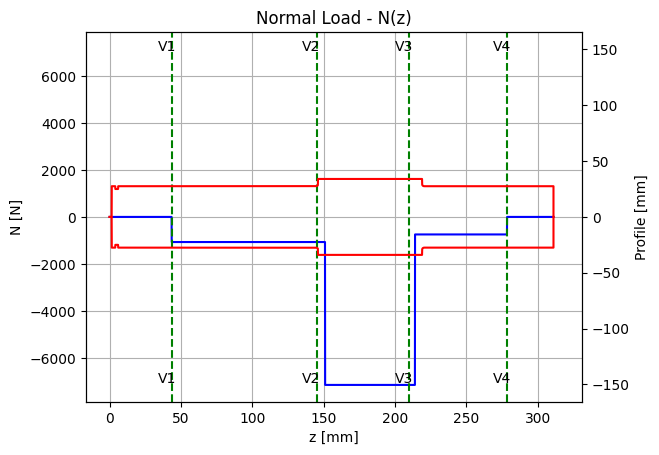

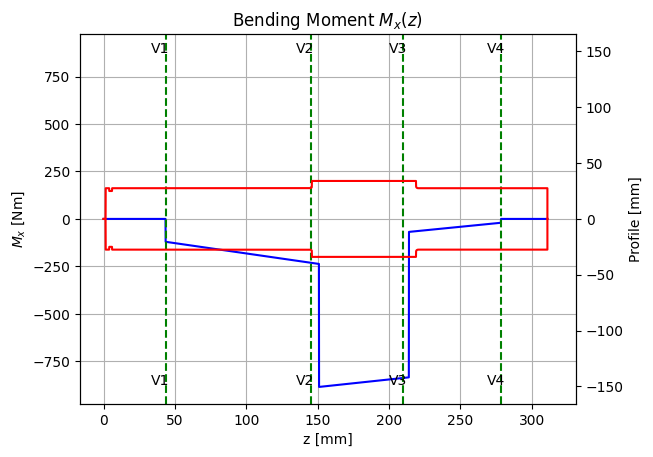

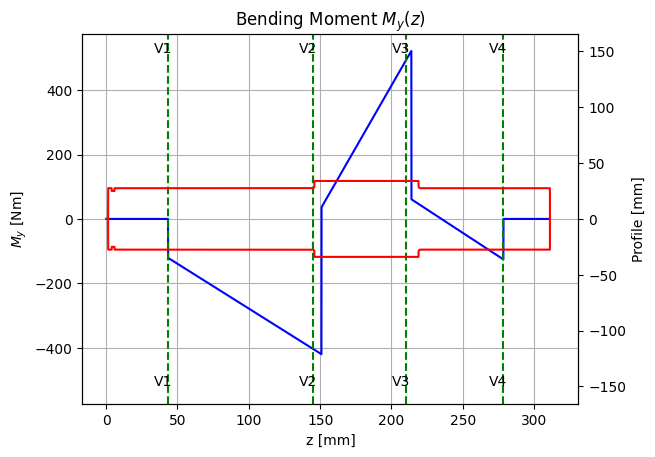

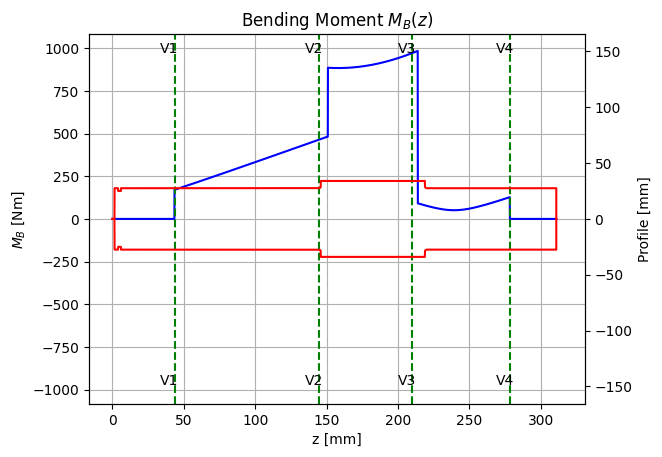

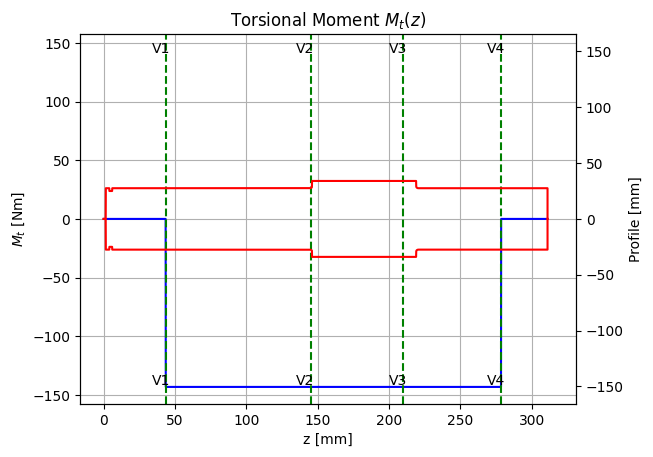

Calculating stresses on shaft A1 along profile 'A1_refinedProfile'.


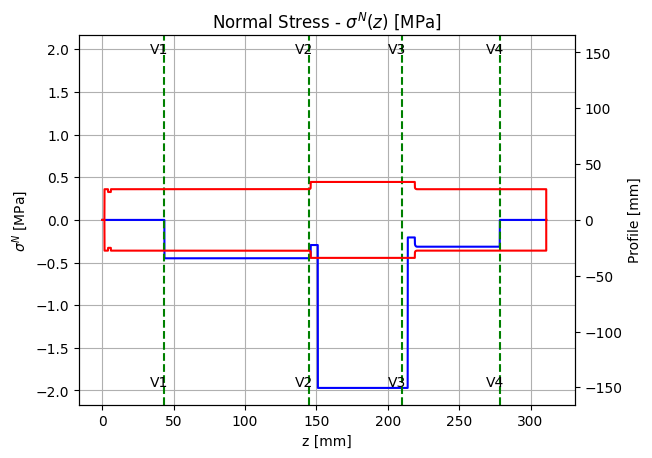

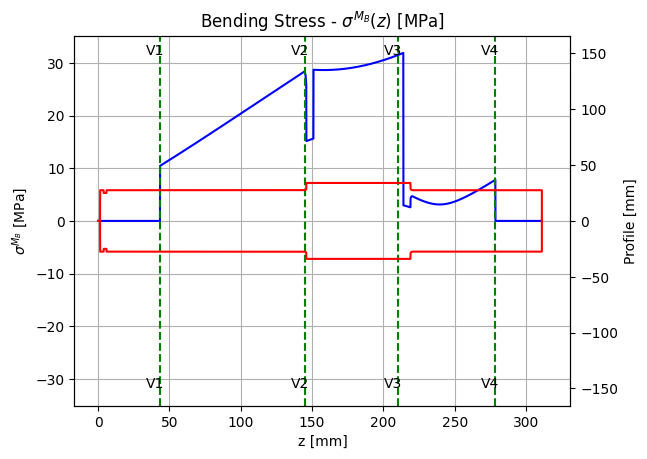

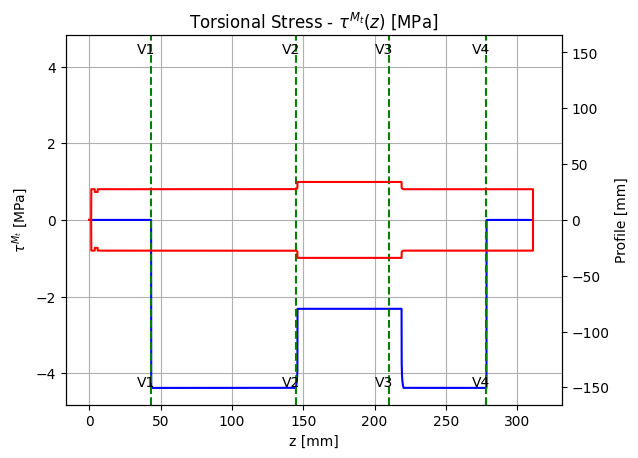

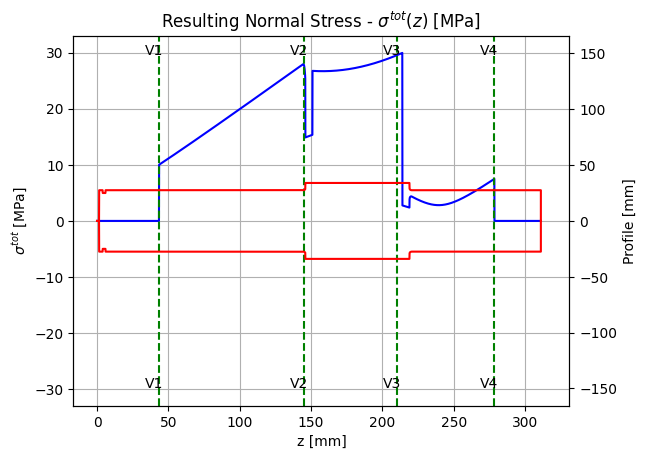

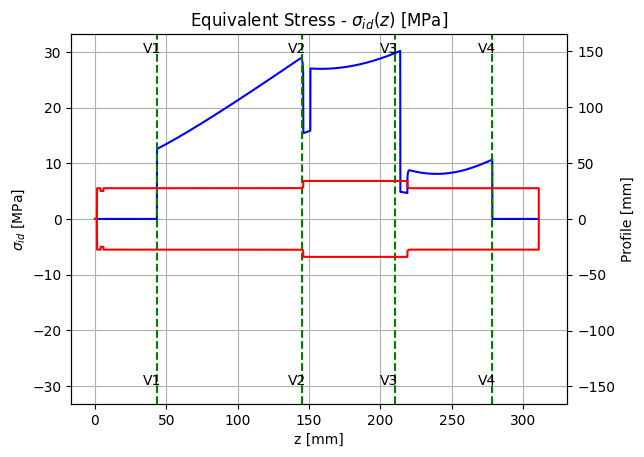

Calculating static safety factor for every user-defined section.
Section Name: Static Safety Factor
Section V1: 29.44 [-].
Section V2: 12.86 [-].
Section V3: 12.42 [-].
Section V4: 34.73 [-].


In [29]:
# Perform static verification on shaft A1
A1.performStaticVerification(RF=referenceFrame)